# This is word2vec model built from scratch.
# This model is trained on the Speech delivered by 'EVAN WILLIAMS' titled “A Journey on the Information Highway”.
(reference to the speech script: https://jamesclear.com/great-speeches/a-journey-on-the-information-highway-by-evan-williams)

In [21]:
text = '''Hi, friends. I want to talk to you today about the Internet just generally because I think I've figured it out. \
I have some theories anyway. I'm also going to need the clicker I think. You were ready for that. Thank you. So to tell you \
about my theories, I'm going to tell you how I got to my theories, which involves telling you a story that is a lot of my life. \
And it starts here from a small place in the middle of the country. Well, the place isn't that small. It has lots of land. \
It's as big as any other place. There's just not a lot of people in that place. My school growing up was probably less than 60 people \
in the high school. They were all white. All the boys played football except for me. And that and in many other ways, I felt \
very different there growing up, and I yearned for the world outside. I didn't feel like I belonged there.'''

In [22]:
text

"Hi, friends. I want to talk to you today about the Internet just generally because I think I've figured it out. I have some theories anyway. I'm also going to need the clicker I think. You were ready for that. Thank you. So to tell you about my theories, I'm going to tell you how I got to my theories, which involves telling you a story that is a lot of my life. And it starts here from a small place in the middle of the country. Well, the place isn't that small. It has lots of land. It's as big as any other place. There's just not a lot of people in that place. My school growing up was probably less than 60 people in the high school. They were all white. All the boys played football except for me. And that and in many other ways, I felt very different there growing up, and I yearned for the world outside. I didn't feel like I belonged there."

In [23]:
# importing regex to clean the text
import re

# converiting the text into tokens
def tokenization(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

In [24]:
tokens = tokenization(text)
tokens

['hi',
 'friends',
 'i',
 'want',
 'to',
 'talk',
 'to',
 'you',
 'today',
 'about',
 'the',
 'internet',
 'just',
 'generally',
 'because',
 'i',
 'think',
 "i've",
 'figured',
 'it',
 'out',
 'i',
 'have',
 'some',
 'theories',
 'anyway',
 "i'm",
 'also',
 'going',
 'to',
 'need',
 'the',
 'clicker',
 'i',
 'think',
 'you',
 'were',
 'ready',
 'for',
 'that',
 'thank',
 'you',
 'so',
 'to',
 'tell',
 'you',
 'about',
 'my',
 'theories',
 "i'm",
 'going',
 'to',
 'tell',
 'you',
 'how',
 'i',
 'got',
 'to',
 'my',
 'theories',
 'which',
 'involves',
 'telling',
 'you',
 'a',
 'story',
 'that',
 'is',
 'a',
 'lot',
 'of',
 'my',
 'life',
 'and',
 'it',
 'starts',
 'here',
 'from',
 'a',
 'small',
 'place',
 'in',
 'the',
 'middle',
 'of',
 'the',
 'country',
 'well',
 'the',
 'place',
 "isn't",
 'that',
 'small',
 'it',
 'has',
 'lots',
 'of',
 'land',
 "it's",
 'as',
 'big',
 'as',
 'any',
 'other',
 'place',
 "there's",
 'just',
 'not',
 'a',
 'lot',
 'of',
 'people',
 'in',
 'that',

In [25]:
# assigning unique numbers to each word
def map(tokens):
    word_to_id = {}
    id_to_word = {}
    
    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token
    
    return word_to_id, id_to_word

In [26]:
# generating index for each word
word_to_id, id_to_word = map(tokens)
word_to_id

{'a': 27,
 'about': 78,
 'all': 45,
 'also': 3,
 'and': 40,
 'any': 67,
 'anyway': 23,
 'as': 11,
 'because': 47,
 'belonged': 20,
 'big': 66,
 'boys': 1,
 'clicker': 41,
 'country': 4,
 "didn't": 10,
 'different': 28,
 'except': 72,
 'feel': 85,
 'felt': 79,
 'figured': 54,
 'football': 17,
 'for': 6,
 'friends': 61,
 'from': 52,
 'generally': 30,
 'going': 71,
 'got': 26,
 'growing': 51,
 'has': 88,
 'have': 82,
 'here': 77,
 'hi': 60,
 'high': 32,
 'how': 97,
 'i': 92,
 "i'm": 84,
 "i've": 64,
 'in': 38,
 'internet': 39,
 'involves': 87,
 'is': 44,
 "isn't": 93,
 'it': 53,
 "it's": 50,
 'just': 57,
 'land': 22,
 'less': 29,
 'life': 9,
 'like': 89,
 'lot': 95,
 'lots': 96,
 'many': 19,
 'me': 65,
 'middle': 86,
 'my': 5,
 'need': 91,
 'not': 81,
 'of': 7,
 'other': 63,
 'out': 80,
 'outside': 70,
 'people': 59,
 'place': 33,
 'played': 34,
 'probably': 21,
 'ready': 48,
 'school': 0,
 'small': 58,
 'so': 76,
 'some': 25,
 'starts': 43,
 'story': 73,
 'talk': 75,
 'tell': 42,
 'telli

In [41]:
# importing numpy
import numpy as np

# generating random seed to maintain repeatibility of the training data
np.random.seed(24)

# defining window size
window = 2

def training_data(tokens, word_to_id, window):
    X = []
    y = []
    n_tokens = len(tokens)
    
    for i in range(n_tokens):
        idx = concat(
            range(max(0, i - window), i), 
            range(i, min(n_tokens, i + window + 1))
        )
        for j in idx:
            if i == j:
                continue
            X.append(one_hot_encode(word_to_id[tokens[i]], len(word_to_id)))
            y.append(one_hot_encode(word_to_id[tokens[j]], len(word_to_id)))
    
    return np.asarray(X), np.asarray(y)

In [42]:
# concatanating words
def concat(*iterables):
    for iterable in iterables:
        yield from iterable

In [43]:
# creating sparse matrix using one hot encoding
def one_hot_encode(id, vocab_size):
    res = [0] * vocab_size
    res[id] = 1
    return res

In [44]:
X, y = training_data(tokens, word_to_id, window)

In [45]:
X.shape, y.shape

((666, 98), (666, 98))

In [46]:
# embedding the model
def init_network(vocab_size, n_embedding):
    model = {
        "w1": np.random.randn(vocab_size, n_embedding),
        "w2": np.random.randn(n_embedding, vocab_size)
    }
    return model

In [47]:
model = init_network(len(word_to_id), 10)

In [48]:
# defining feed forward Neural Network
def forward(model, X, return_cache=True):
    cache = {}
    
    cache["a1"] = X @ model["w1"]
    cache["a2"] = cache["a1"] @ model["w2"]
    cache["z"] = softmax(cache["a2"])
    
    if not return_cache:
        return cache["z"]
    return cache

In [49]:
# defining softmax layer for multi-class classification
def softmax(X):
    res = []
    for x in X:
        exp = np.exp(x)
        res.append(exp / exp.sum())
    return res

In [50]:
(X @ model["w1"]).shape

(666, 10)

In [51]:
(X @ model["w1"] @ model["w2"]).shape

(666, 98)

In [52]:
# backpropogation model
def backward(model, X, y, alpha):
    cache  = forward(model, X)
    da2 = cache["z"] - y
    dw2 = cache["a1"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = X.T @ da1
    assert(dw2.shape == model["w2"].shape)
    assert(dw1.shape == model["w1"].shape)
    model["w1"] -= alpha * dw1
    model["w2"] -= alpha * dw2
    return cross_entropy(cache["z"], y)

In [53]:
# defining loss
def cross_entropy(z, y):
    return - np.sum(np.log(z) * y)

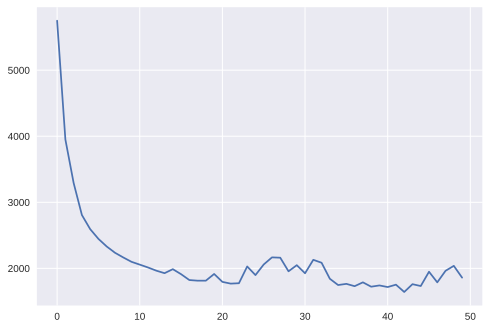

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")

n_iter = 50
learning_rate = 0.05

history = [backward(model, X, y, learning_rate) for _ in range(n_iter)]

plt.plot(range(len(history)), history)
plt.show()

In [56]:
learning = one_hot_encode(word_to_id["clicker"], len(word_to_id))
result = forward(model, [learning], return_cache=False)[0]

for word in (id_to_word[id] for id in np.argsort(result)[::-1]):
    print(word)

i
the
think
need
figured
want
today
were
i've
white
ready
clicker
hi
well
thank
all
talk
you
like
belonged
boys
out
it
tell
has
that
to
so
small
how
and
didn't
here
land
feel
world
friends
my
high
outside
got
have
they
also
except
going
middle
yearned
because
people
story
school
life
is
isn't
lots
about
starts
i'm
some
football
ways
internet
other
generally
country
for
big
very
of
probably
me
played
in
than
was
felt
theories
it's
up
different
from
many
less
telling
a
there
any
growing
involves
place
anyway
just
there's
as
lot
which
not


In [57]:
model["w1"]

array([[-7.88326841e-02, -9.77638673e-01,  7.53862311e-02,
        -1.72734973e+00, -1.26294891e+00, -1.99116577e+00,
         9.53913173e-01, -4.38144198e-01, -8.77401262e-01,
         9.20390720e-02],
       [-4.98985485e-01,  2.15062479e+00,  1.18526383e+00,
         8.31794972e-01, -7.67884608e-01,  2.72829929e-01,
         1.11080219e+00, -4.79242474e-01, -4.90659582e-02,
         1.63435022e+00],
       [-9.78519241e-01, -8.78842637e-02,  6.59690513e-02,
        -6.66203826e-01,  1.14510852e+00,  1.75799498e-01,
        -6.14589036e-01,  1.73817024e+00,  8.15207175e-01,
        -1.13872413e+00],
       [-8.09861899e-01,  2.50744642e-01,  1.03296464e+00,
        -1.08864512e+00,  1.38219722e+00, -4.04914264e-01,
         9.45242989e-01, -5.56597894e-01,  1.32073920e+00,
         1.51168964e+00],
       [ 4.79691443e-01,  7.86740811e-01,  5.58551514e-01,
         6.58402091e-01,  4.69444355e-01,  1.62368304e-01,
         4.44937416e-01,  2.97897525e-01, -1.60416568e+00,
        -3.

In [58]:
def get_embedding(model, word):
    try:
        idx = word_to_id[word]
    except KeyError:
        print("`word` not in corpus")
    one_hot = one_hot_encode(idx, len(word_to_id))
    return forward(model, one_hot)["a1"]

In [59]:
get_embedding(model, "clicker")

array([-0.27046915,  0.16771774, -1.54829181,  0.83288279,  1.02759183,
        0.4450003 ,  1.58743125,  0.00225622, -1.98912513,  0.00276402])